In [33]:
from pathlib import Path

import cv2
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [2]:
data_folder = Path("/mnt/c/Users/vladt/Downloads/strawberry_hack_data/")

In [3]:
img_paths = list(data_folder.iterdir())
len(img_paths)

2041

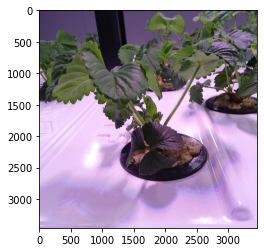

In [27]:
idx = np.random.randint(0, len(img_paths))
img = cv2.imread(str(img_paths[idx]))[..., ::-1]
imshow(img);

In [31]:
LOWER_GREEN = (20, 0, 0)
UPPER_GREEN = (60, 255, 200)

In [29]:
def segment_leaves(img):
    hsv_plant = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_plant)
    # h_ = cv2.equalizeHist(h)
    # s_ = cv2.equalizeHist(s)
    v_ = cv2.equalizeHist(v)
    hsv_plant = cv2.merge((h, s, v_))
    mask = cv2.inRange(hsv_plant, LOWER_GREEN, UPPER_GREEN)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations = 3)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((35, 35), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((19, 19), np.uint8))
    result = cv2.bitwise_and(img, img, mask=mask)
    
    return result

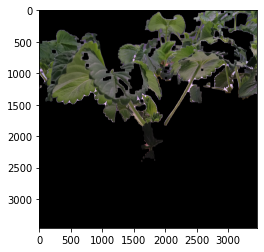

In [30]:
result = segment_leaves(img)
imshow(result);

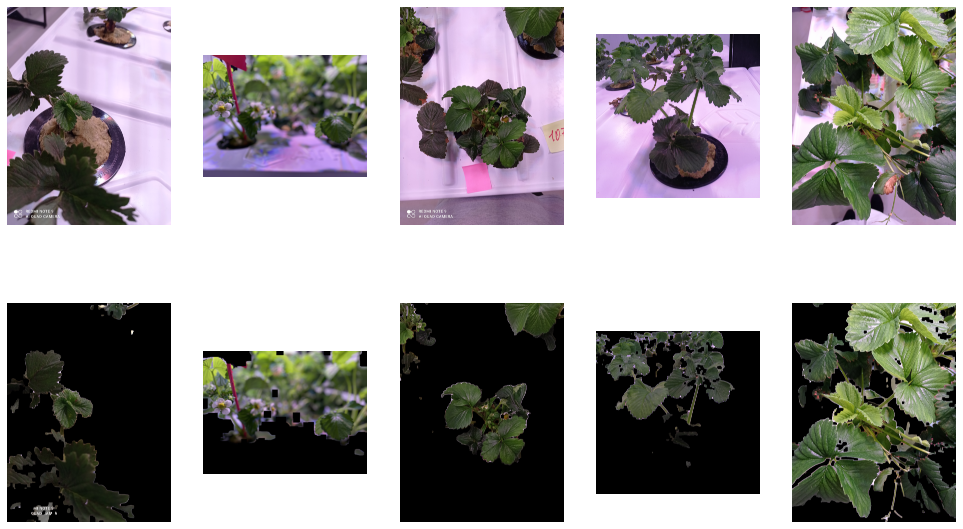

In [39]:
indices = np.random.choice(np.arange(0, len(img_paths)), size=5)
images = [cv2.imread(str(img_paths[idx]))[..., ::-1] for idx in indices]
results = [segment_leaves(img) for img in images]

fig, axs = plt.subplots(nrows=2, ncols=len(images), figsize=(17, 10))
for i, (img, res) in enumerate(zip(images, results)):
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[1, i].imshow(res)
    axs[1, i].axis('off')